# Yash Agrawal
### 22BCE3030
#### Dataset Link: https://github.com/rogue-socket/theory_da_datasets/blob/main/placementdata.csv

In [76]:
import pandas as pd
df = pd.read_csv("../placementdata.csv")

In [77]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [78]:
categorical_cols = []
label_cols = []
number_cols = []
float_cols = []
other = []

for col in df:
    if df[col].dtype == "object":
        if df[col].nunique() <= 3:
            label_cols.append(col)
        else:
            categorical_cols.append(col)
    elif df[col].dtype == "int64":
        number_cols.append(col)
    elif df[col].dtype == "float64":
        float_cols.append(col)
    else:
        other.append(col)

print(categorical_cols)
print(label_cols)
print(number_cols)
print(float_cols)
print(other)

[]
['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']
['StudentID', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SSC_Marks', 'HSC_Marks']
['CGPA', 'SoftSkillsRating']
[]


In [79]:
# encoding the categorical cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [80]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


In [81]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['PlacementStatus'], random_state=42)

# Separating features and target variable
X_train, X_test = train_df.drop(columns=['PlacementStatus']), test_df.drop(columns=['PlacementStatus'])
y_train, y_test = train_df['PlacementStatus'], test_df['PlacementStatus']

In [82]:
# scaling the variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Function to check if scaling is needed
def check_scaling_needed(df):
    scaling_needed = {}
    for col in df.columns:
        min_val, max_val = df[col].min(), df[col].max()
        if min_val < -1 or max_val > 1:  # Arbitrary threshold for scaling need
            scaling_needed[col] = (min_val, max_val)
    return scaling_needed

# Function to choose appropriate scaler
def choose_scaler(df):
    # Check for normal distribution (mean ≈ 0, std ≈ 1 suggests StandardScaler)
    normal_cols = []
    for col in df.columns:
        mean, std = df[col].mean(), df[col].std()
        if -1 <= mean <= 1 and 0.5 <= std <= 2:
            normal_cols.append(col)

    return normal_cols

# Check if scaling is needed
scaling_needed = check_scaling_needed(X_train)
if scaling_needed:
    print("Columns that need scaling:", scaling_needed)

    # Choose scaler for each column
    normal_cols = choose_scaler(X_train)

    # Apply StandardScaler to normally distributed columns, MinMaxScaler otherwise
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    for col in X_train.columns:
        if col in normal_cols:
            scaler = standard_scaler
        else:
            scaler = minmax_scaler

        # Fit scaler on training data and transform both train & test
        X_train_scaled[col] = scaler.fit_transform(X_train[[col]])
        X_test_scaled[col] = scaler.transform(X_test[[col]])

        X_train = X_train_scaled
        X_test = X_test_scaled
    print("Scaling applied successfully!")
else:
    print("No scaling needed.")



Columns that need scaling: {'StudentID': (1, 10000), 'CGPA': (6.5, 9.1), 'Internships': (0, 2), 'Projects': (0, 3), 'Workshops/Certifications': (0, 3), 'AptitudeTestScore': (60, 90), 'SoftSkillsRating': (3.0, 4.8), 'SSC_Marks': (55, 90), 'HSC_Marks': (57, 88)}
Scaling applied successfully!


In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate models
def evaluate_model(name, model, X_test, y_test, results):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    con_mat = confusion_matrix(y_test, y_pred)

    results[name] = {
        'accuracy': acc,
        'precision_score': prec,
        'recall': rec,
        'f1_score': f1,
        'confusion_matrix': con_mat,
        'model': model
    }

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(con_mat)


In [84]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Hyperparameter grids
param_grid_id3 = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'criterion': ['entropy']}
param_grid_cart = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'criterion': ['gini']}
param_grid_knn = {'n_neighbors': range(3, 20, 2), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
param_grid_nb = {'var_smoothing': np.logspace(-9, 0, 10)}

# Models
id3 = DecisionTreeClassifier(random_state=42)
cart = DecisionTreeClassifier(random_state=42)
knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])  # Scaling for KNN
nb = GaussianNB()

In [85]:
from sklearn.model_selection import GridSearchCV
# Perform hyperparameter tuning
grid_search_id3 = GridSearchCV(id3, param_grid_id3, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_cart = GridSearchCV(cart, param_grid_cart, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn = GridSearchCV(knn, {'knn__' + k: v for k, v in param_grid_knn.items()}, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit models
grid_search_id3.fit(X_train, y_train)
grid_search_cart.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_nb.fit(X_train, y_train)

# Get best models
best_id3 = grid_search_id3.best_estimator_
best_cart = grid_search_cart.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_nb = grid_search_nb.best_estimator_

# Print best hyperparameters
print("Best ID3 Hyperparameters:", grid_search_id3.best_params_)
print("Best CART Hyperparameters:", grid_search_cart.best_params_)
print("Best KNN Hyperparameters:", grid_search_knn.best_params_)
print("Best Naïve Bayes Hyperparameters:", grid_search_nb.best_params_)

Best ID3 Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best CART Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best KNN Hyperparameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 19, 'knn__weights': 'uniform'}
Best Naïve Bayes Hyperparameters: {'var_smoothing': 1e-09}


In [86]:
# Store results
results = {}
evaluate_model('ID3', best_id3, X_test, y_test, results)
evaluate_model('CART', best_cart, X_test, y_test, results)
evaluate_model('KNN', best_knn, X_test, y_test, results)
evaluate_model('Naïve Bayes', best_nb, X_test, y_test, results)


=== ID3 ===
Accuracy: 0.7815
Precision: 0.7376
Recall: 0.7437
F1-score: 0.7407
Confusion Matrix:
[[939 222]
 [215 624]]

=== CART ===
Accuracy: 0.7805
Precision: 0.7347
Recall: 0.7461
F1-score: 0.7404
Confusion Matrix:
[[935 226]
 [213 626]]

=== KNN ===
Accuracy: 0.7945
Precision: 0.7603
Recall: 0.7449
F1-score: 0.7526
Confusion Matrix:
[[964 197]
 [214 625]]

=== Naïve Bayes ===
Accuracy: 0.8005
Precision: 0.7450
Recall: 0.7974
F1-score: 0.7703
Confusion Matrix:
[[932 229]
 [170 669]]


In [87]:
def visualize_models(results, X_train, y_train):
    from sklearn.tree import plot_tree
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Decision Tree Visualization
    for name in ['ID3', 'CART']:
        try:
            model = results[name]['model']
            plt.figure(figsize=(20, 10))
            plot_tree(
                model,
                feature_names=list(X_train.columns),
                class_names=['Not Placed', 'Placed'],
                filled=True,
                rounded=True,
                fontsize=10
            )
            plt.title(f"{name} Decision Tree")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error visualizing {name} decision tree: {e}")

    # Confusion Matrix Heatmaps
    for name, data in results.items():
        try:
            plt.figure(figsize=(5, 4))
            sns.heatmap(
                data['confusion_matrix'],
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=[0, 1],
                yticklabels=[0, 1]
            )
            plt.title(f"{name} - Confusion Matrix")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error creating confusion matrix for {name}: {e}")

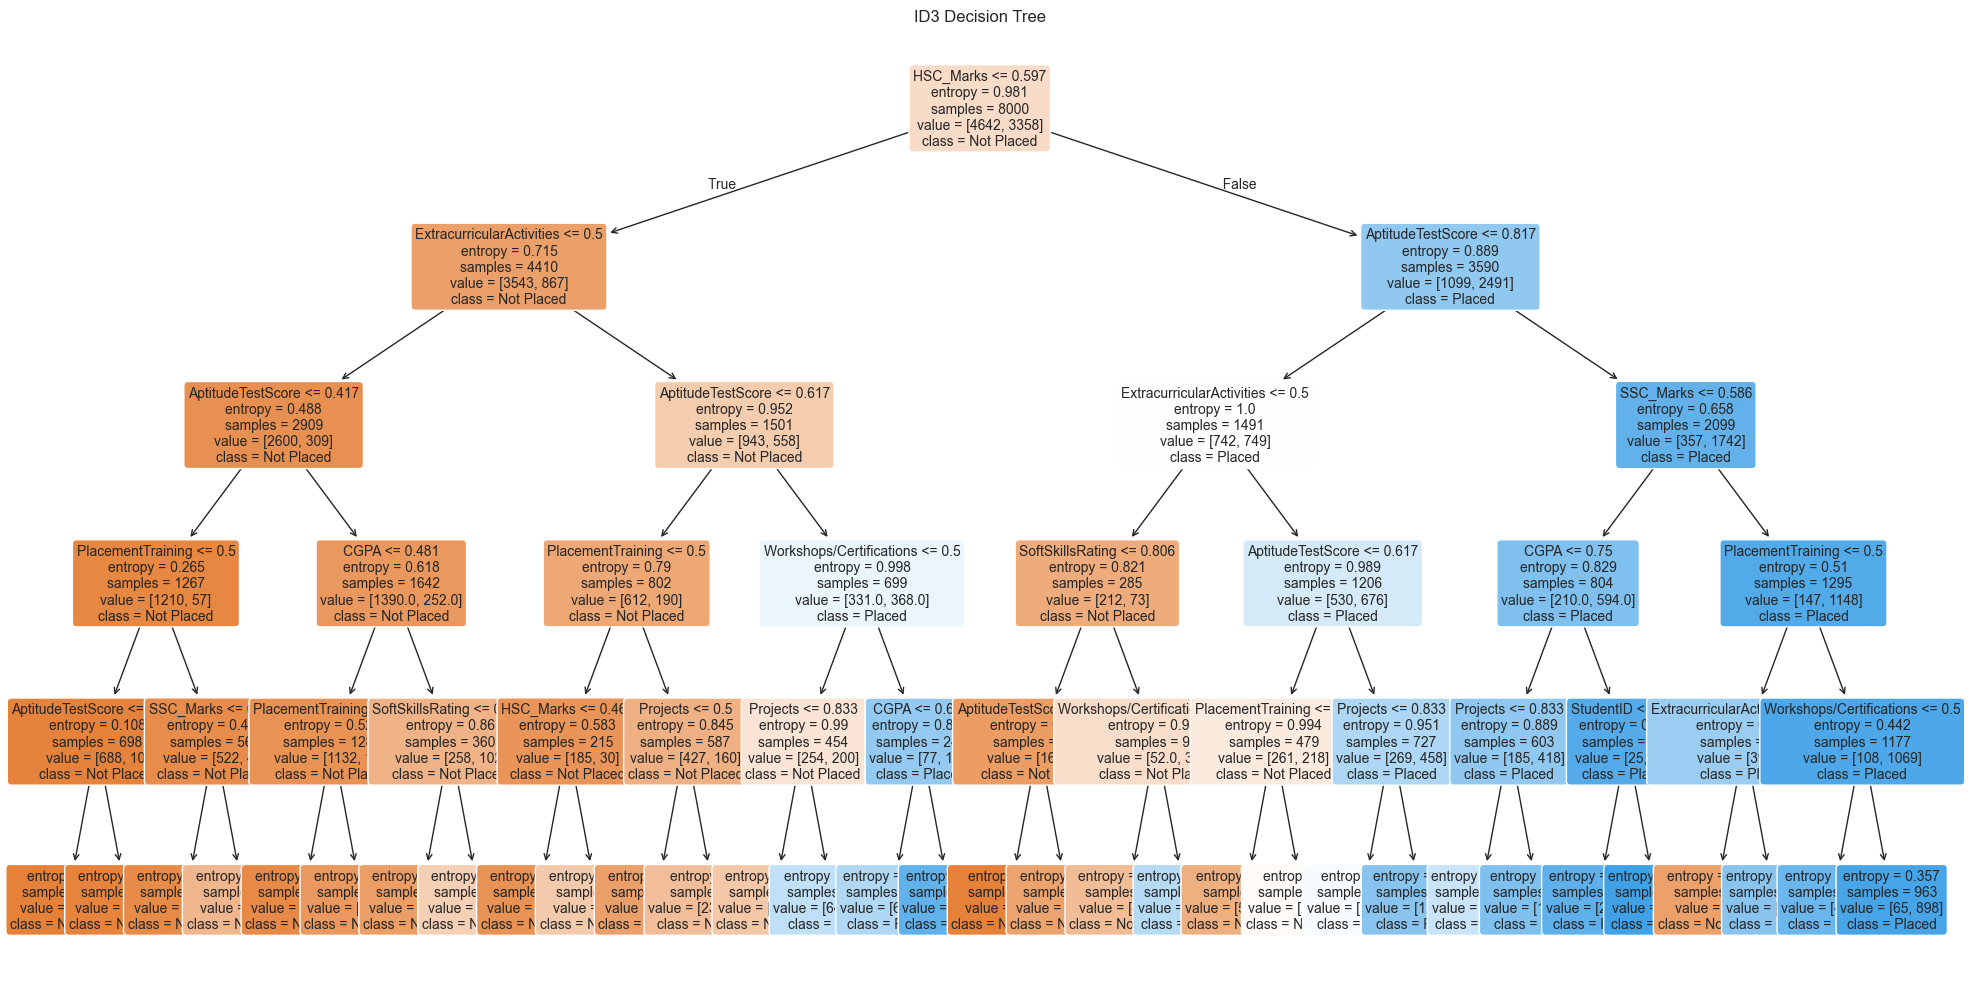

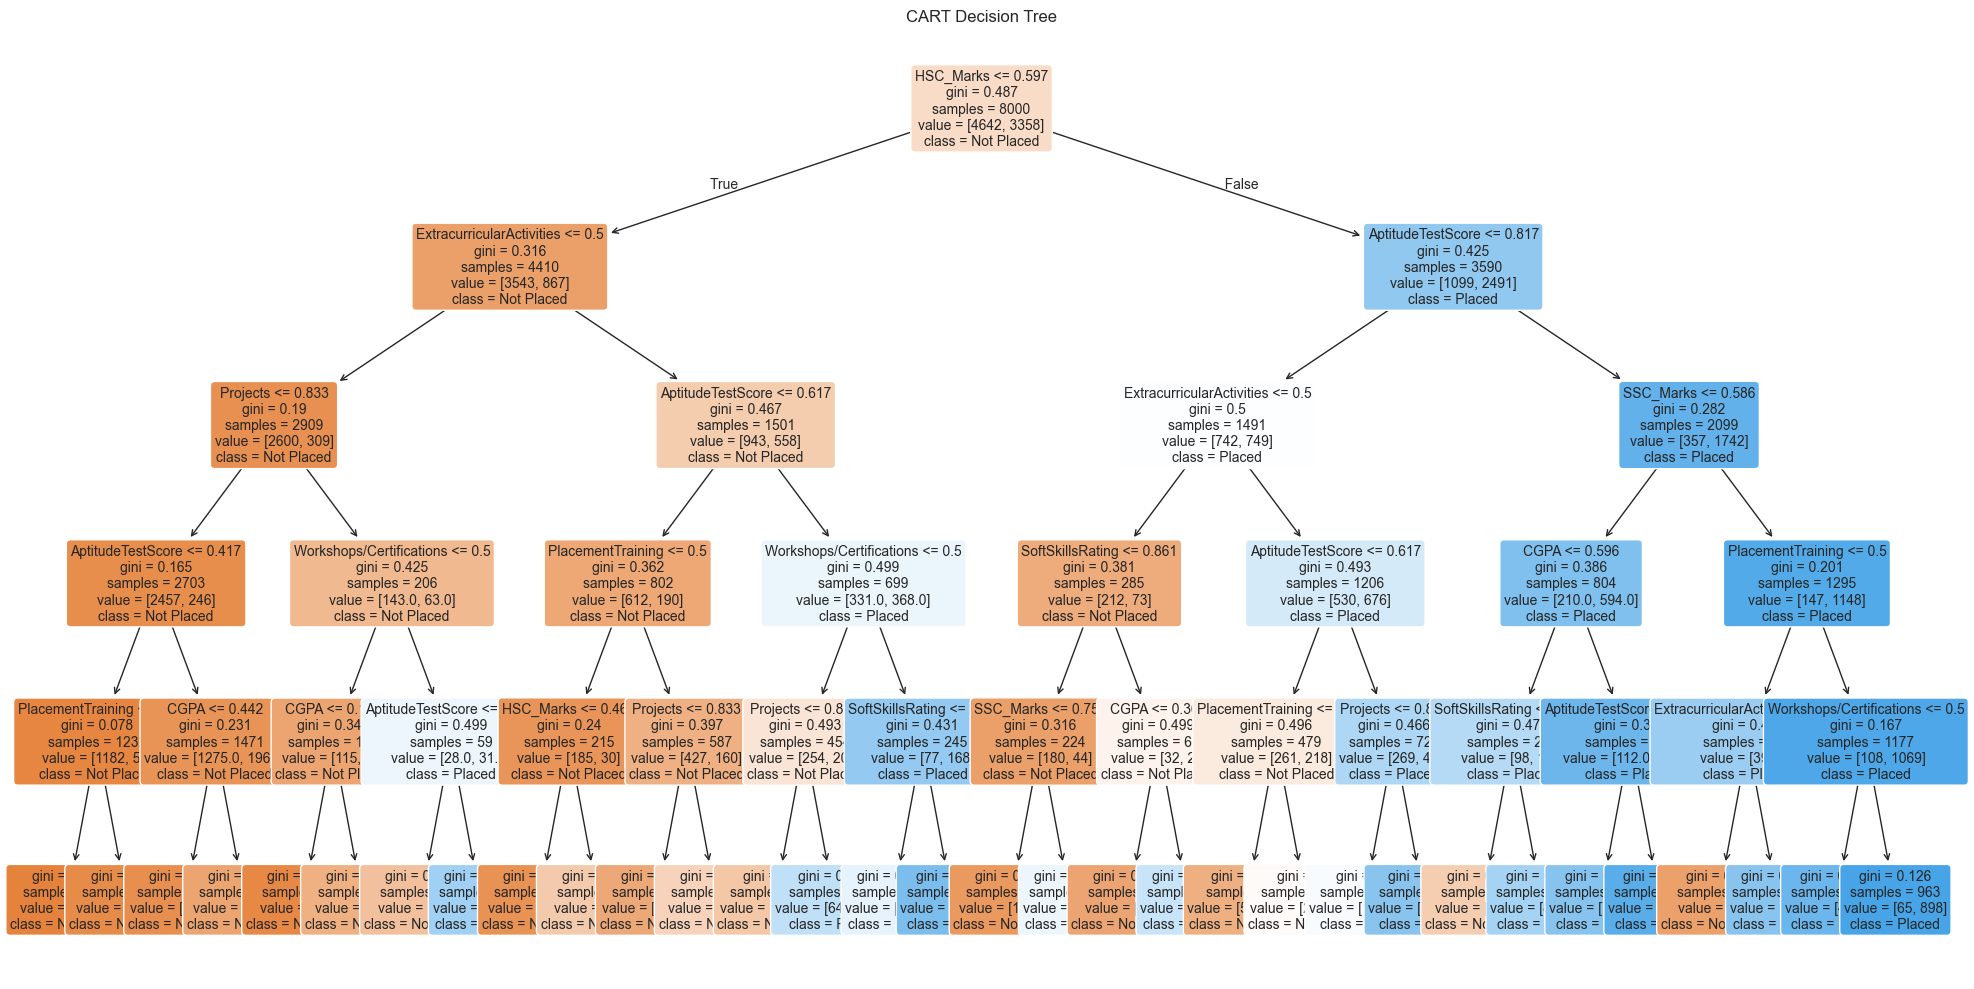

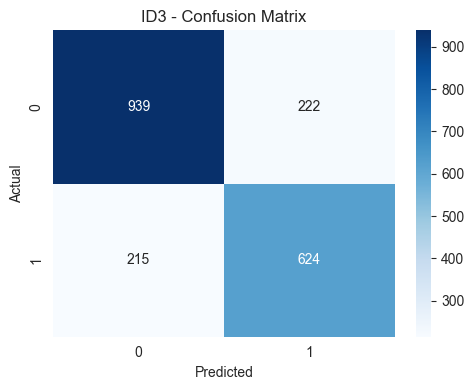

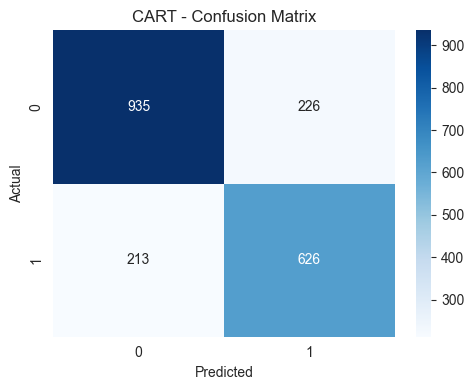

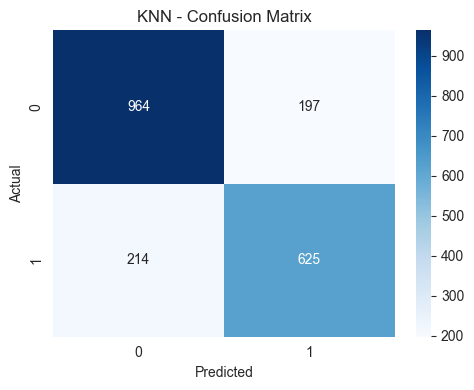

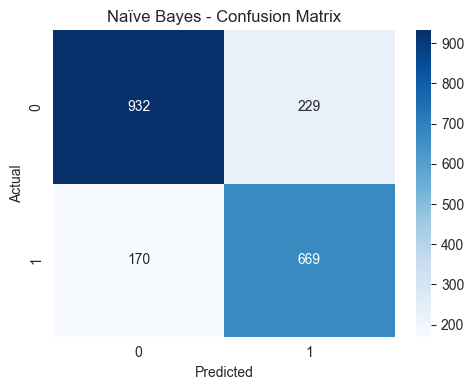

In [88]:
visualize_models(results, X_train, y_train)

# **Classification Model Analysis Report**

## **1. Chosen Algorithms and Rationale**
### **ID3 (Iterative Dichotomiser 3)**
- A decision tree algorithm that uses the **entropy-based information gain** to split nodes.
- Suitable for categorical and numerical data.
- Chosen due to its **interpretability** and **fast computation** for structured data.

### **CART (Classification and Regression Trees)**
- Another decision tree method that uses the **Gini index** as a splitting criterion.
- Often used as a baseline for **tree-based models** and compared with ID3.
- Works well with **imbalanced datasets** when properly tuned.

### **K-Nearest Neighbors (KNN)**
- A **non-parametric model** that classifies data points based on their closest neighbors.
- Chosen due to its ability to **capture non-linear relationships**.
- The optimal parameters were found using hyperparameter tuning:
  - **Metric:** Euclidean
  - **Number of neighbors:** 19
  - **Weights:** Uniform

### **Naïve Bayes**
- A **probabilistic classifier** that assumes feature independence.
- Performs well with **high-dimensional data** and **small datasets**.
- Chosen due to its efficiency and ease of implementation.
- The best hyperparameter was found:
  - **Var smoothing:** 1e-09

---

## **2. Model Performance Metrics**
The following table summarizes the classification performance:

| Model          | Accuracy | Precision | Recall | F1-Score |
|---------------|---------|-----------|--------|----------|
| **ID3**       | 78.15%  | 73.76%    | 74.37% | 74.07%   |
| **CART**      | 78.05%  | 73.47%    | 74.61% | 74.04%   |
| **KNN**       | 79.45%  | 76.03%    | 74.49% | 75.26%   |
| **Naïve Bayes** | **80.05%** | 74.50% | **79.74%** | **77.03%** |

### **Key Observations**
- **Naïve Bayes has the highest accuracy (80.05%)**, making it the best-performing model for this dataset.
- **KNN follows closely with 79.45% accuracy** and the highest precision (76.03%).
- **Decision tree models (ID3 & CART) performed similarly (≈78% accuracy)** but had slightly higher misclassification rates.

---

## **3. Insights from Confusion Matrices**
Each model’s confusion matrix provides insights into its classification performance:

### **ID3 - Confusion Matrix**
| Actual | Predicted 0 | Predicted 1 |
|--------|------------|------------|
| **0**  | 939        | 222        |
| **1**  | 215        | 624        |

- **False Positives (222 cases):** Instances where the model incorrectly classified class `0` as `1`.
- **False Negatives (215 cases):** Cases where the model failed to identify class `1`.

### **CART - Confusion Matrix**
| Actual | Predicted 0 | Predicted 1 |
|--------|------------|------------|
| **0**  | 935        | 226        |
| **1**  | 213        | 626        |

- **Similar to ID3**, with very close FP (226) and FN (213) values.
- **Higher recall (74.61%)** compared to ID3, indicating better detection of class `1`.

### **KNN - Confusion Matrix**
| Actual | Predicted 0 | Predicted 1 |
|--------|------------|------------|
| **0**  | 964        | 197        |
| **1**  | 214        | 625        |

- **Fewer false positives (197), meaning better precision**.
- **Slightly lower recall (74.49%) compared to CART**, indicating slightly more false negatives.

### **Naïve Bayes - Confusion Matrix**
| Actual | Predicted 0 | Predicted 1 |
|--------|------------|------------|
| **0**  | 932        | 229        |
| **1**  | 170        | 669        |

- **Lowest false negatives (170), leading to the highest recall (79.74%)**.
- **Slightly more false positives (229), meaning lower precision (74.50%) compared to KNN**.

---

## **4. Misclassification Analysis**
Misclassification rates across the models indicate some key trends:

- **Decision Trees (ID3 & CART)**:
  - **Slightly higher false negatives**, meaning they struggle with correctly identifying class `1` instances.
  - **Prone to overfitting**, leading to minor performance drops.

- **KNN**:
  - **Lower false positives**, making it a more precise model.
  - **Higher false negatives**, indicating it might be biased toward class `0`.

- **Naïve Bayes**:
  - **Best at recall (79.74%)**, making it excellent for detecting class `1` cases.
  - **Higher false positives**, showing that it might classify some class `0` instances incorrectly.

---

## **5. Suggestions for Model Improvement**
### **1. Feature Engineering**
- **Feature selection:** Identify the most relevant features to reduce noise and improve model interpretability.
- **Feature scaling:** Standardizing or normalizing features could enhance KNN’s performance.
- **Feature transformation:** Creating polynomial or interaction terms could improve tree-based models.

### **2. Hyperparameter Tuning**
- **Decision Trees:**
  - Increase `max_depth` to allow for more complex decision boundaries.
  - Try `min_samples_split` values larger than `2` to reduce overfitting.

- **KNN:**
  - Experiment with different distance metrics (e.g., Manhattan, Minkowski).
  - Tune `n_neighbors` to find the optimal trade-off between bias and variance.

- **Naïve Bayes:**
  - Test different smoothing parameters (`var_smoothing`) to reduce false positives.
  - Consider a **Gaussian Mixture Model (GMM)** for better class separation.

### **3. Ensemble Methods**
- **Random Forest:**
  - Combining multiple decision trees could improve generalization and stability.

- **Boosting Techniques (XGBoost, AdaBoost):**
  - These can help decision trees by focusing on hard-to-classify examples.

- **Stacking Models:**
  - Combining KNN, Naïve Bayes, and Decision Trees in a meta-learning framework might yield better results.

---

## **6. Conclusion**
- **Naïve Bayes emerged as the best performer**, with the highest recall and accuracy.
- **KNN had better precision**, making it useful when minimizing false positives is essential.
- **Decision tree models (ID3 & CART) performed reasonably well but could benefit from tuning or ensemble methods**.
- **Future improvements include feature engineering, hyperparameter tuning, and ensemble approaches**.